## Modelos de Naive Bayes e Árvores de Decisão 

Aplicados à dados de crédito bancário



In [ ]:
install.packages("e1071") 
install.packages("party")

library(party)
library(e1071) # modelo arvore
library(dplyr) # Analises estatisticas
library(ggplot2) # Exploração Gráfica
library(glue) # print especial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Dados de crédito

In [ ]:
credit = read.csv("https://www.openml.org/data/get_csv/29/dataset_29_credit-a.arff",
			header=T,
			stringsAsFactors=TRUE) 

In [ ]:
head(credit)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [ ]:
RNGversion("3.5.2")
set.seed(1987)

# Elimina valores NA
credit[credit[]=="?"]=NA
credit=na.omit(credit)



Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”


## Naive Bayes

In [ ]:
# Gera Conjuntos de Treinamento e Teste
L <- sample(1:nrow(credit),round(nrow(credit)/3))
train <- credit[-L,]
test <- credit[L,]

In [ ]:
fitBayes = naiveBayes(class~.,data=train,laplace=1)

# predict Output 
predBayes = predict(fitBayes, test)
predBayes

[1] + + - - - - - + - - - + - + + - - - + + - - - - - + + + - - - - + - - + -
 [38] - + - + - - - + - + - - - - - - + + - - + + - - + - - - + - - - - - - + +
 [75] + + + + - - + + - + - - + - - - + - - + + - - - - - - - - + - - + + - - +
[112] - - + - + + - - - + - - + - + - - - - - - - + - - - - + + + - + - + - - -
[149] - - - - + + + + + - - - + + - - - - - - - - - - - - - + - - + - - - + - -
[186] + - - - - - - - + - - + - - - - + + + - - + + + - - - - - + - - -
Levels: - +

In [ ]:
# matriz de confus�o
matconf = table(predBayes,test$class, dnn = list("Previsto", "Real"))
print(matconf)


        Real
Previsto  -  +
       - 83 63
       + 39 33


In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 33

Verdadeiro Negativo = 83

Falso Positivo =      39

Falso Negativo =      63

Número de eventos = 96

Número de não eventos = 122

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.532

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.344

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 0.68

## Árvore de Decisão

In [ ]:
#Modelo

modelo_arvore = ctree(class~.,data=train)

# predict Output 
previsao_arvore = predict(modelo_arvore, test)
previsao_arvore

[1] + - - + - + - + + - + - + - + - + - - + + + - - + - - - + - - - + + - + -
 [38] - + - - + + + - + - - + - - + - + + + + + + + - + - + + - - + + - - + - -
 [75] + + - - + - - + - + + + - + + + - - + + + - + + + + + + - + - + + - - - +
[112] - - + - + + + - + + + - - + - - - + + + - + + + - - + - + - - + + - - + +
[149] + + + - - + - + - + + + - - + - - - - + - - - + + - + + - - - + + - + - +
[186] + + + - + - - - + + - - - - + - + + + + - + - - + + + + + - + - +
Levels: - +

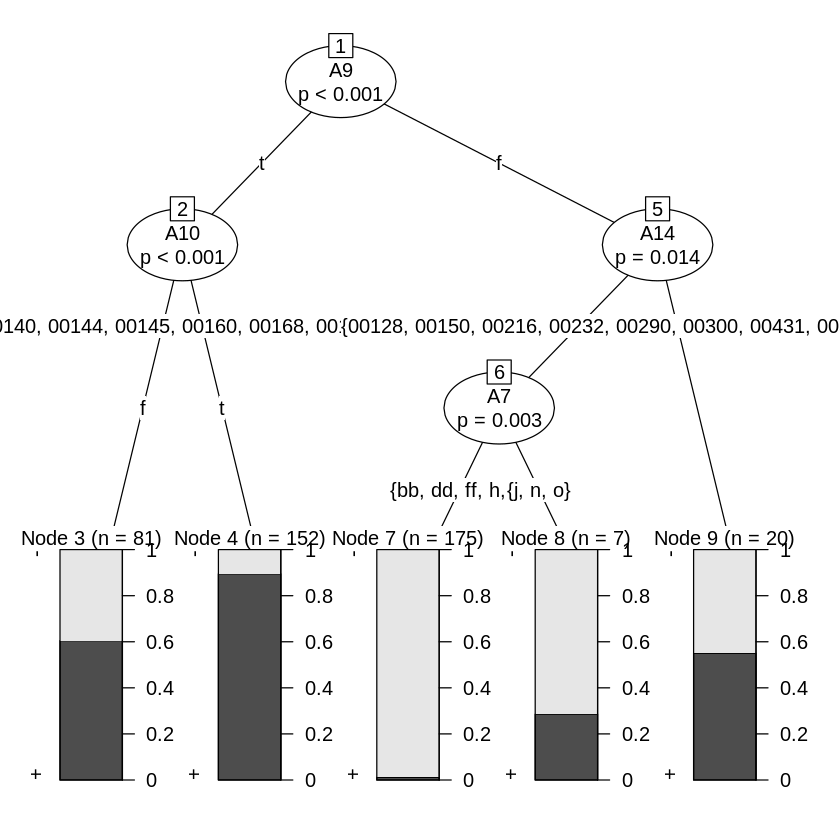

In [ ]:
plot(modelo_arvore)

In [ ]:
# matriz de confus�o
matconf = table(previsao_arvore,test$class, dnn = list("Previsto", "Real"))
print(matconf)


        Real
Previsto  -  +
       - 98  3
       + 24 93


In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 93

Verdadeiro Negativo = 98

Falso Positivo =      24

Falso Negativo =      3

Número de eventos = 96

Número de não eventos = 122

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.876

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.969

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 0.803